<a href="https://colab.research.google.com/github/Thujaina/NIT-Internship/blob/main/ANN_Heart_Disease_Prediction_With_MCC_Cells.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikeras


In [2]:
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart.csv


In [3]:
import os
os.listdir()

['.config', 'heart.csv', 'sample_data']

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')






In [5]:
data = pd.read_csv("heart.csv")

print(data.head())
print("Dataset shape:", data.shape)


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
Dataset shape: (918, 12)


In [6]:
target_col = "HeartDisease"

X = data.drop(columns=[target_col])
y = data[target_col]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (918, 11)
y shape: (918,)


In [7]:
cat_cols = X.select_dtypes(include=["object"]).columns
le = LabelEncoder()

for col in cat_cols:
    X[col] = le.fit_transform(X[col])

X.head()



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (734, 11)
Test size: (184, 11)


In [10]:
def ann_model():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


In [11]:
model = ann_model()

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=1
)


Epoch 1/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7554 - loss: 0.5879 - val_accuracy: 0.7211 - val_loss: 0.5611
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8248 - loss: 0.4828 - val_accuracy: 0.7619 - val_loss: 0.5184
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8524 - loss: 0.4127 - val_accuracy: 0.7823 - val_loss: 0.4936
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8677 - loss: 0.3510 - val_accuracy: 0.7891 - val_loss: 0.4825
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8914 - loss: 0.3124 - val_accuracy: 0.7755 - val_loss: 0.4816
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8934 - loss: 0.2975 - val_accuracy: 0.7823 - val_loss: 0.4824
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8723 - loss: 0.3116 - val_accuracy: 0.7755 - val_loss: 0.4851
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8621 - loss: 0.3141 - val_accuracy: 0.7823 - val_loss

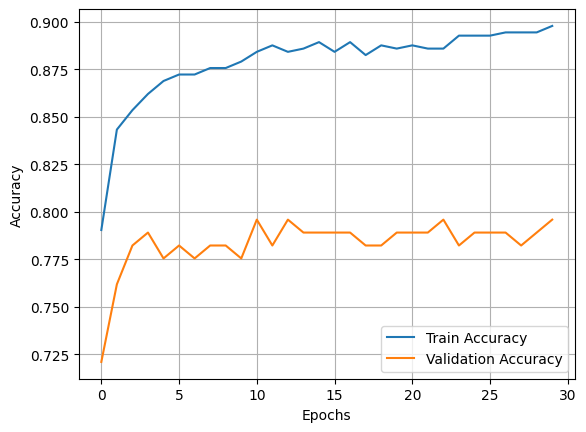

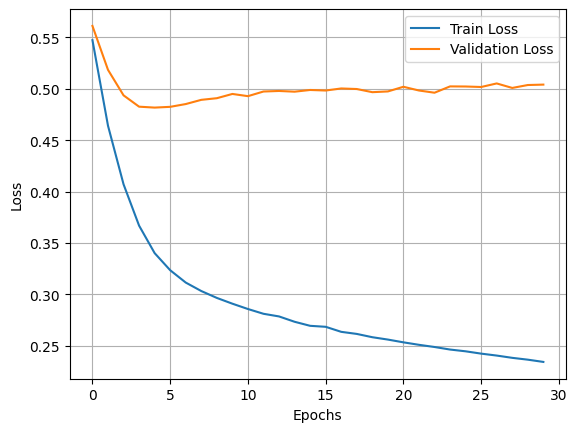

In [12]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()



In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

y_pred = (model.predict(X_test) > 0.5).astype(int)

print(classification_report(y_test, y_pred))

mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


Test Accuracy: 0.8750
Test Loss: 0.3627
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
              precision    recall  f1-score   support

           0       0.87      0.84      0.86        82
           1       0.88      0.90      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184

Matthews Correlation Coefficient (MCC): 0.7465


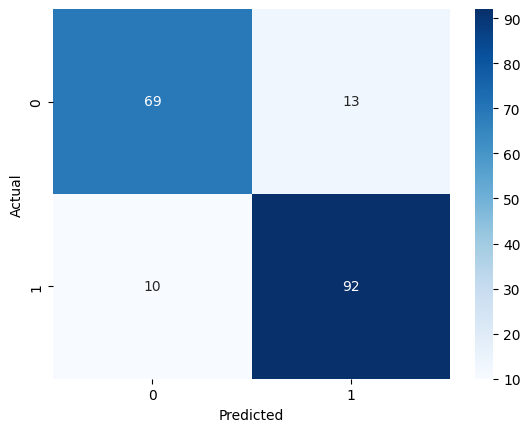

In [14]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [15]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

cv_accuracies = []
cv_mccs = []

fold = 1
for train_idx, val_idx in kfold.split(X_train):
    print(f"\nTraining Fold {fold}")

    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model = ann_model()
    model.fit(X_tr, y_tr, epochs=30, batch_size=32, verbose=0)

    loss, acc = model.evaluate(X_val, y_val, verbose=0)

    y_val_pred = (model.predict(X_val) > 0.5).astype(int)
    mcc = matthews_corrcoef(y_val, y_val_pred)

    print(f"Fold Accuracy: {acc:.4f}")
    print(f"Fold MCC: {mcc:.4f}")

    cv_accuracies.append(acc)
    cv_mccs.append(mcc)
    fold += 1

print("\nMean CV Accuracy:", np.mean(cv_accuracies))
print("Mean CV MCC:", np.mean(cv_mccs))



Training Fold 1
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Fold Accuracy: 0.8435
Fold MCC: 0.6832

Training Fold 2


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Fold Accuracy: 0.8707
Fold MCC: 0.7385

Training Fold 3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Fold Accuracy: 0.8367
Fold MCC: 0.6586

Training Fold 4
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Fold Accuracy: 0.8435
Fold MCC: 0.6920

Training Fold 5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Fold Accuracy: 0.8699
Fold MCC: 0.7362

Mean CV Accuracy: 0.8528841614723206
Mean CV MCC: 0.7017041766070895
